In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../../cleaned_tweet_data.csv"
data = pd.read_csv(file_path)

data.head()

,sentiment,content
0,empty,tiffanylue know listenin bad habit earlier sta...
1,sadness,layin n bed headache ughhhh waitin call
2,sadness,funeral ceremony gloomy friday
3,enthusiasm,want hang friend soon
4,neutral,dannycastillo want trade someone houston ticke...


In [3]:
data.sentiment.value_counts()

neutral       8598
worry         8437
happiness     5184
sadness       5154
love          3785
surprise      2181
fun           1775
relief        1522
hate          1322
empty          822
enthusiasm     758
boredom        179
anger          110
Name: sentiment, dtype: int64

In [4]:
data = data.dropna(subset=['content'])

In [5]:
X = data['content'].astype(str)
y = data['sentiment']

le = LabelEncoder()
y = le.fit_transform(y)

vec = TfidfVectorizer()
X = vec.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

In [7]:
rfc = RandomForestClassifier(random_state=0 )

In [8]:
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

In [9]:
print(classification_report(y_test, rf_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, rf_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        33
           2       0.11      0.01      0.02       154
           3       0.00      0.00      0.00       154
           4       0.10      0.01      0.02       366
           5       0.32      0.33      0.33      1047
           6       0.43      0.19      0.26       254
           7       0.46      0.41      0.44       728
           8       0.33      0.59      0.43      1781
           9       0.27      0.04      0.07       303
          10       0.35      0.24      0.28      1030
          11       0.29      0.04      0.07       404
          12       0.33      0.40      0.36      1680

    accuracy                           0.34      7962
   macro avg       0.23      0.17      0.17      7962
weighted avg       0.32      0.34      0.31      7962



C:\Users\chanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


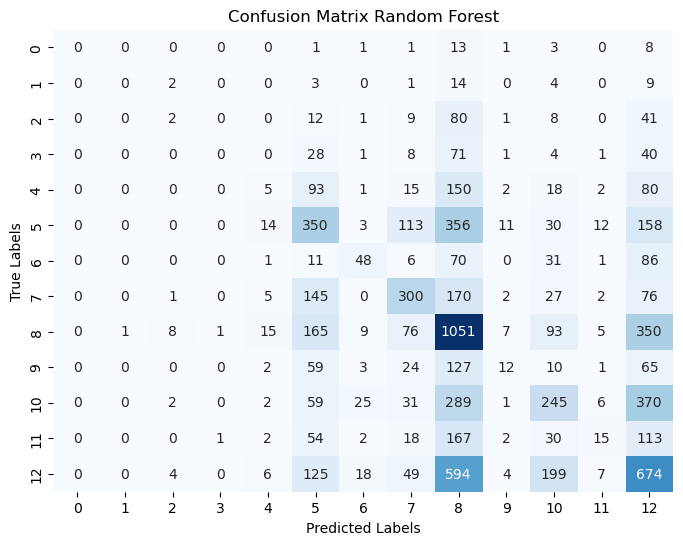

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [11]:
accuracy = accuracy_score(y_test, rf_pred) # accuracy
precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1) # precision 
recall = recall_score(y_test, rf_pred, average='weighted') # recall
f1 = f1_score(y_test, rf_pred, average='weighted') # f1

print("Name: ", "RF")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Name:  RF
Accuracy:  0.3393619693544336
Precision:  0.3208854649837652
Recall:  0.3393619693544336
F1:  0.3062040240821973
